In [1]:
import pandas as pd

# Upload dataset from local
from google.colab import files
uploaded = files.upload()

# Load CSV
df = pd.read_csv("netflix_titles.csv")
df.head()


Saving netflix_titles.csv to netflix_titles.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Step 1: Check null values
df.isnull().sum()

# Step 2: Drop duplicate rows
df.drop_duplicates(inplace=True)

# Step 3: Fill missing values
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['director'] = df['director'].fillna('Not Available')
df['cast'] = df['cast'].fillna('Not Available')
df['date_added'] = df['date_added'].ffill()


# Step 4: Convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Step 5: Rename columns
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

# Step 6: Final check and save
df.info()
df.to_csv("netflix_titles_cleaned.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


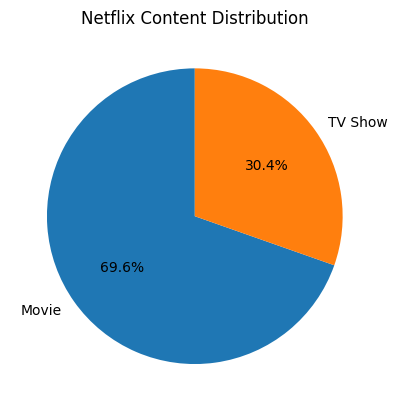

In [4]:
import matplotlib.pyplot as plt

# Show distribution of content types
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Netflix Content Distribution')
plt.ylabel('')
plt.show()

In [5]:
from google.colab import files
files.download("netflix_titles_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>